In [2]:
import numpy as np
import pandas as pd
import matplotlib as mp
import statsmodels.api as sm

In [3]:
from statsmodels.sandbox.regression.gmm import GMM
from statsmodels.sandbox.regression.gmm import IV2SLS 

In [4]:
# Load dataset
data = pd.read_csv('C:/Users/tauny/Desktop/Schulich - School/Classes/Fall 2024 - Semester 2/Predictive Modelling/Exams/Mid Term/midterm_partone.csv')

In [5]:
data.head()

,Constant,Stock Change,Inventory Turnover,Operating Profit,Interaction Effect,Current Ratio,Quick Ratio,Debt Asset Ratio
0,1,0.870332,1.795946,0.115846,0.208053,1.672527,0.255171,0.473317
1,1,-0.047347,1.395501,0.436967,0.609788,1.637261,0.221763,0.489967
2,1,0.001176,1.664563,0.541016,0.900555,1.640619,0.189141,0.374269
3,1,-0.901200,1.605738,0.539399,0.866133,1.436221,0.131944,0.224399
4,1,-0.176353,1.591451,0.539938,0.859285,1.433140,0.183095,0.213446


In [6]:
data

,Constant,Stock Change,Inventory Turnover,Operating Profit,Interaction Effect,Current Ratio,Quick Ratio,Debt Asset Ratio
0,1,0.870332,1.795946,0.115846,0.208053,1.672527,0.255171,0.473317
1,1,-0.047347,1.395501,0.436967,0.609788,1.637261,0.221763,0.489967
2,1,0.001176,1.664563,0.541016,0.900555,1.640619,0.189141,0.374269
3,1,-0.901200,1.605738,0.539399,0.866133,1.436221,0.131944,0.224399
4,1,-0.176353,1.591451,0.539938,0.859285,1.433140,0.183095,0.213446
...,...,...,...,...,...,...,...,...
1691,1,-0.015543,5.225766,0.309119,1.615384,3.554503,2.197871,0.005549
1692,1,0.399089,5.324390,0.274782,1.463044,3.745006,2.324502,0.004359
1693,1,-0.702200,5.575258,0.287503,1.602905,3.434909,2.282626,0.000000
1694,1,0.283926,5.423463,0.256657,1.391968,2.876645,1.454948,0.000000


In [7]:
data.describe()

,Constant,Stock Change,Inventory Turnover,Operating Profit,Interaction Effect,Current Ratio,Quick Ratio,Debt Asset Ratio
count,1696.0,1696.000000,1696.000000,1696.000000,1696.000000,1696.000000,1696.000000,1696.000000
mean,1.0,-0.012977,24.633183,0.255719,6.584336,1.972308,1.069610,0.150254
std,0.0,0.490888,37.044608,0.590330,42.544580,1.509598,1.161417,0.275665
min,1.0,-2.366261,0.996475,-5.989709,-411.751139,0.202040,0.035457,0.000000
25%,1.0,-0.258291,3.733259,0.151177,0.646555,1.079045,0.366561,0.000000
50%,1.0,-0.005839,6.372805,0.244090,1.596459,1.585408,0.694119,0.037937
75%,1.0,0.234015,29.433657,0.338010,5.298054,2.364317,1.258383,0.236709
max,1.0,4.138063,240.046041,7.450718,884.467955,13.026268,10.501619,3.675735


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1696 entries, 0 to 1695
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Constant            1696 non-null   int64  
 1   Stock Change        1696 non-null   float64
 2   Inventory Turnover  1696 non-null   float64
 3   Operating Profit    1696 non-null   float64
 4   Interaction Effect  1696 non-null   float64
 5   Current Ratio       1696 non-null   float64
 6   Quick Ratio         1696 non-null   float64
 7   Debt Asset Ratio    1696 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 106.1 KB


In [9]:
OLS_model_IT = sm.OLS(data['Inventory Turnover'], data[["Constant", "Current Ratio", "Quick Ratio", "Debt Asset Ratio"]]).fit()
endog_predict = OLS_model_IT.predict(data[["Constant", "Current Ratio", "Quick Ratio", "Debt Asset Ratio"]])
data["Endogenous Param"] = endog_predict

In [10]:
OLS_model_SC = sm.OLS(data["Stock Change"], data[["Constant", "Endogenous Param", "Operating Profit", "Interaction Effect"]]).fit()

In [11]:
OLS_model_SC.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Stock Change   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     8.530
Date:                Fri, 08 Nov 2024   Prob (F-statistic):           1.27e-05
Time:                        14:11:39   Log-Likelihood:                -1186.5
No. Observations:                1696   AIC:                             2381.
Df Residuals:                    1692   BIC:                             2403.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Constant              -0.0176      0.020     -0.896      0.370      -0.056       0.021
Endogenous Param       0.0011      0.001      1.827      0.068   -7.76e-05       0.002
Operating Profit      -0.1201      0.028     -4.319      0.000      -0.175      -0.066
Interaction Effect     0.0014      0.000      3.621      0.000       0.001       0.002
==============================================================================
Omnibus:                      368.832   Durbin-Watson:                   2.243
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3433.920
Skew:                           0.742   Prob(JB):                         0.00
Kurtosis:                       9.811   Cond. No.                         109.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
y_vals  = np.array(data["Stock Change"])
x_vals  = np.array(data[["Inventory Turnover","Operating Profit","Interaction Effect"]])
iv_vals = np.array(data[["Current Ratio","Quick Ratio","Debt Asset Ratio"]])

class gmm(GMM):
    def momcond(self, params):
        p0, p1, p2, p3 = params
        endog = self.endog
        exog = self.exog
        inst = self.instrument   

        error0 = endog - p0 - p1 * exog[:,0] - p2 * exog[:,1] - p3 * exog[:,2]
        error1 = (endog - p0 - p1 * exog[:,0] - p2 * exog[:,1] - p3 * exog[:,2]) * exog[:,1]
        error2 = (endog - p0 - p1 * exog[:,0] - p2 * exog[:,1] - p3 * exog[:,2]) * exog[:,2]
        error3 = (endog - p0 - p1 * exog[:,0] - p2 * exog[:,1] - p3 * exog[:,2]) * inst[:,0] 
        error4 = (endog - p0 - p1 * exog[:,0] - p2 * exog[:,1] - p3 * exog[:,2]) * inst[:,1] 
        error5 = (endog - p0 - p1 * exog[:,0] - p2 * exog[:,1] - p3 * exog[:,2]) * inst[:,2] 

        g = np.column_stack((error0, error1, error2, error3, error4, error5))
        return g


beta0 = np.array([0.1, 0.1, 0.1, 0.1])
res = gmm(endog = y_vals, exog = x_vals, instrument = iv_vals, k_moms=6, k_params=4).fit(beta0)

res.summary()

Optimization terminated successfully.
         Current function value: 0.000046
         Iterations: 8
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.000373
         Iterations: 7
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.000372
         Iterations: 5
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000372
         Iterations: 5
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.000372
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 gmm Results                                  
==============================================================================
Dep. Variable:                      y   Hansen J:                       0.6317
Model:                            gmm   Prob (Hansen J):                 0.729
Method:                           GMM                                         
Date:                Fri, 08 Nov 2024                                         
Time:                        14:11:40                                         
No. Observations:                1696                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p 0           -0.0200      0.021     -0.964      0.335      -0.061       0.021
p 1            0.0011      0.001      1.843      0.065   -6.89e-05       0.002
p 2           -0.1071      0.032     -3.370      0.001      -0.169      -0.045
p 3            0.0011      0.000      2.760      0.006       0.000       0.002
==============================================================================
"""

PART 1

In [13]:
y_vals  = np.array(data["Stock Change"])
x_vals  = np.array(data[["Inventory Turnover","Operating Profit","Interaction Effect"]])
iv_vals = np.array(data[["Current Ratio","Quick Ratio","Debt Asset Ratio"]])

class gmm(GMM):
    def momcond(self, params):
        p0, p1, p2, p3, delta = params
        endog = self.endog
        exog = self.exog
        inst = self.instrument

        error0 = endog - p0 - p1 * exog[:, 0] - p2 * exog[:, 1] - p3 * exog[:, 2] - delta
        error1 = (endog - p0 - p1 * exog[:, 0] - p2 * exog[:, 1] - p3 * exog[:, 2]) * exog[:, 1] - delta
        error2 = (endog - p0 - p1 * exog[:, 0] - p2 * exog[:, 1] - p3 * exog[:, 2]) * exog[:, 2] - delta
        error3 = (endog - p0 - p1 * exog[:, 0] - p2 * exog[:, 1] - p3 * exog[:, 2]) * inst[:, 0] - delta
        error4 = (endog - p0 - p1 * exog[:, 0] - p2 * exog[:, 1] - p3 * exog[:, 2]) * inst[:, 1] - delta
        error5 = (endog - p0 - p1 * exog[:, 0] - p2 * exog[:, 1] - p3 * exog[:, 2]) * inst[:, 2] - delta

        g = np.column_stack((error0, error1, error2, error3, error4, error5))
        return g


beta0 = np.array([0.1, 0.1, 0.1, 0.1, 0.1])
res = gmm(endog = y_vals, exog = x_vals, instrument = iv_vals, k_moms=6, k_params=5).fit(beta0)

res.summary()

Optimization terminated successfully.
         Current function value: 0.000044
         Iterations: 9
         Function evaluations: 14
         Gradient evaluations: 14
Optimization terminated successfully.
         Current function value: 0.000367
         Iterations: 8
         Function evaluations: 14
         Gradient evaluations: 14
Optimization terminated successfully.
         Current function value: 0.000367
         Iterations: 7
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.000367
         Iterations: 1
         Function evaluations: 3
         Gradient evaluations: 3


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 gmm Results                                  
==============================================================================
Dep. Variable:                      y   Hansen J:                       0.6229
Model:                            gmm   Prob (Hansen J):                 0.430
Method:                           GMM                                         
Date:                Fri, 08 Nov 2024                                         
Time:                        14:11:40                                         
No. Observations:                1696                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p 0           -0.0209      0.023     -0.916      0.360      -0.066       0.024
p 1            0.0011      0.001      1.574      0.115      -0.000       0.003
p 2           -0.1048      0.040     -2.634      0.008      -0.183      -0.027
p 3            0.0011      0.001      2.120      0.034    8.31e-05       0.002
p 4           -0.0003      0.004     -0.094      0.925      -0.007       0.007
==============================================================================
"""

Part B

In [14]:
# Load dataset
b_data = pd.read_csv('C:/Users/tauny/Desktop/Schulich - School/Classes/Fall 2024 - Semester 2/Predictive Modelling/Exams/Mid Term/midterm_parttwo.csv')

In [15]:
b_data.head()

,Years of Education after High School,Requested Credit Amount,Number of Dependents,Monthly Income,Monthly Expense,Marital Status,Credit Rating
0,1,Low,No dependent,Very low,Very low,Married,Positive
1,2,Low,No dependent,Very low,Very low,Single,Positive
2,1,Low,No dependent,Very low,Very low,Single,Positive
3,3,Low,No dependent,Very low,Very low,Married,Positive
4,3,Low,No dependent,Very low,Very low,Single,Negative


In [16]:
b_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8081 entries, 0 to 8080
Data columns (total 7 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Years of Education after High School  8081 non-null   int64 
 1   Requested Credit Amount               8081 non-null   object
 2   Number of Dependents                  8081 non-null   object
 3   Monthly Income                        8081 non-null   object
 4   Monthly Expense                       8081 non-null   object
 5   Marital Status                        8081 non-null   object
 6   Credit Rating                         8081 non-null   object
dtypes: int64(1), object(6)
memory usage: 442.1+ KB


In [17]:
from sklearn.preprocessing import OneHotEncoder

In [18]:
# Initialize OneHotEncoder
encoder = OneHotEncoder(dtype=int, handle_unknown='ignore', sparse_output=False)

In [19]:
# Fit and transform the specified columns
encoded_cols = encoder.fit_transform(b_data[['Requested Credit Amount', 'Marital Status', 'Number of Dependents', 'Monthly Income', 'Monthly Expense']])
# Create a DataFrame from the encoded columns
encoded_df = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out(['Requested Credit Amount', 'Marital Status', 'Number of Dependents', 'Monthly Income', 'Monthly Expense']), index=b_data.index)

In [20]:
# Concatenate the encoded DataFrame back to the original train_data
b_data = pd.concat([b_data, encoded_df], axis=1)

# Drop the original columns
b_data = b_data.drop(columns=['Requested Credit Amount', 'Marital Status', 'Number of Dependents', 'Monthly Income', 'Monthly Expense'])

In [21]:
# Convert the 'Credit Rating' column to binary values: 1 for 'positive' and 0 for 'negative'
b_data['Credit Rating'] = b_data['Credit Rating'].map({'Positive': 1, 'Negative': 0})

In [22]:
print(b_data['Credit Rating'].unique())

[1 0]


In [23]:
b_data.head()

,Years of Education after High School,Credit Rating,Requested Credit Amount_High,Requested Credit Amount_Low,Requested Credit Amount_Medium,Marital Status_Married,Marital Status_Not specified,Marital Status_Single,Number of Dependents_Less than 2,Number of Dependents_More than 2,...,Monthly Income_High,Monthly Income_Low,Monthly Income_Moderate,Monthly Income_Very High,Monthly Income_Very low,Monthly Expense_High,Monthly Expense_Low,Monthly Expense_Moderate,Monthly Expense_Very high,Monthly Expense_Very low
0,1,1,0,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,2,1,0,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,1,1,0,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
3,3,1,0,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler

In [46]:
X = b_data.drop('Credit Rating', axis=1)

# Define the target/ dependent variable (y)
y = b_data['Credit Rating']

In [48]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the features using MinMaxScaler
X = scaler.fit_transform(X)

# Convert the scaled features back to a DataFrame
X_scaled_df = pd.DataFrame(X, columns=b_data.drop('Credit Rating', axis=1).columns)

# Combine scaled features and target variable
b_data_scaled = pd.concat([X_scaled_df, y.reset_index(drop=True)], axis=1)


In [49]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.5, random_state=42)

In [50]:
# Fit logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

In [29]:
LogReg_Report = classification_report (y_test, y_pred)
print(LogReg_Report)
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       577
           1       0.86      1.00      0.92      3464

    accuracy                           0.86      4041
   macro avg       0.43      0.50      0.46      4041
weighted avg       0.73      0.86      0.79      4041

[[   0  577]
 [   0 3464]]


c:\Users\tauny\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\tauny\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\tauny\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [51]:
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train the logistic regression model on the resampled dataset
log_reg_model_smote = LogisticRegression()
log_reg_model_smote.fit(X_train_resampled, y_train_resampled)

# Evaluate the model again
y_pred= log_reg_model_smote.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.16      0.54      0.25       577
           1       0.88      0.55      0.67      3464

    accuracy                           0.54      4041
   macro avg       0.52      0.54      0.46      4041
weighted avg       0.77      0.54      0.61      4041

[[ 309  268]
 [1572 1892]]


In [31]:
# Adjust the threshold
threshold = 0.2

y_pred_probs = log_reg_model_smote.predict_proba(X_test)[:, 1]
y_pred_custom = np.where(y_pred_probs > threshold, 1, 0)

print(classification_report(y_test, y_pred_custom))
print(confusion_matrix(y_test, y_pred_custom))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       577
           1       0.86      1.00      0.92      3464

    accuracy                           0.86      4041
   macro avg       0.43      0.50      0.46      4041
weighted avg       0.73      0.86      0.79      4041

[[   0  577]
 [   0 3464]]


c:\Users\tauny\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\tauny\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\tauny\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [32]:
# Print the contributing values for each feature
coefficients = log_reg_model_smote.coef_[0]  
feature_names = X_train_resampled.columns if isinstance(X_train_resampled, pd.DataFrame) else range(X_train_resampled.shape[1])
contributions = dict(zip(feature_names, coefficients))

print("Feature Contributions:")
for feature, coef in contributions.items():
    print(f"{feature}: {coef}")

Feature Contributions:
0: 0.6244437116641864
1: 0.23784139011928235
2: -0.02791096023966019
3: -0.10775833382281051
4: -0.2914616574374634
5: 0.4771711513514563
6: -0.08353739785733971
7: -0.07945877536164417
8: 0.32298477384377483
9: -0.1413539024257192
10: -0.08762489763954713
11: -0.2048283077335007
12: -0.44162033153287994
13: 0.7913506364551947
14: 0.044894996507195785
15: 0.5073044982335859
16: 0.43844561743196875
17: 0.40245477316697986
18: -1.2965745428235813
19: 0.05054175004775157


In [33]:
# Sort contributions in descending order (high to low)
sorted_high_to_low = sorted(contributions.items(), key=lambda x: x[1], reverse=True)

# Sort contributions in ascending order (low to high)
sorted_low_to_high = sorted(contributions.items(), key=lambda x: x[1])

# Print features sorted by high to low contributions
print("Features sorted by contributions (High to Low):")
for feature, contrib in sorted_high_to_low:
    print(f"{feature}: Contribution = {contrib}")

print("\nFeatures sorted by contributions (Low to High):")
# Print features sorted by low to high contributions
for feature, contrib in sorted_low_to_high:
    print(f"{feature}: Contribution = {contrib}")

Features sorted by contributions (High to Low):
13: Contribution = 0.7913506364551947
0: Contribution = 0.6244437116641864
15: Contribution = 0.5073044982335859
5: Contribution = 0.4771711513514563
16: Contribution = 0.43844561743196875
17: Contribution = 0.40245477316697986
8: Contribution = 0.32298477384377483
1: Contribution = 0.23784139011928235
19: Contribution = 0.05054175004775157
14: Contribution = 0.044894996507195785
2: Contribution = -0.02791096023966019
7: Contribution = -0.07945877536164417
6: Contribution = -0.08353739785733971
10: Contribution = -0.08762489763954713
3: Contribution = -0.10775833382281051
9: Contribution = -0.1413539024257192
11: Contribution = -0.2048283077335007
4: Contribution = -0.2914616574374634
12: Contribution = -0.44162033153287994
18: Contribution = -1.2965745428235813

Features sorted by contributions (Low to High):
18: Contribution = -1.2965745428235813
12: Contribution = -0.44162033153287994
4: Contribution = -0.2914616574374634
11: Contribut

In [52]:
# Drop features that have minimal or negative contributions
features_to_drop = [6, 7, 10, 14, 19]
X_train_updated = np.delete(X_train_resampled, features_to_drop, axis=1)
X_test_updated = np.delete(X_test, features_to_drop, axis=1)

# Train the logistic regression model again
log_reg_model_updated = LogisticRegression()
log_reg_model_updated.fit(X_train_updated, y_train_resampled)

# Evaluate the updated model
y_pred_updated = log_reg_model_updated.predict(X_test_updated)
print(classification_report(y_test, y_pred_updated))
print(confusion_matrix(y_test, y_pred_updated))

              precision    recall  f1-score   support

           0       0.16      0.52      0.25       577
           1       0.87      0.55      0.67      3464

    accuracy                           0.54      4041
   macro avg       0.52      0.53      0.46      4041
weighted avg       0.77      0.54      0.61      4041

[[ 301  276]
 [1573 1891]]


In [35]:
# Define the logistic regression model with L2 regularization (Ridge)
ridge_log_reg_model = LogisticRegression(penalty='l2', C=1.0, solver='lbfgs', max_iter=1000)  # 'C' is inverse of regularization strength

# Train the model again on the training data
ridge_log_reg_model.fit(X_train_updated, y_train_resampled)

# Make predictions on the test set using the Ridge-regularized model
y_pred_best_ridge = ridge_log_reg_model.predict(X_test_updated)

# Evaluate the Ridge-regularized model
print(classification_report(y_test, y_pred_best_ridge))
print(confusion_matrix(y_test, y_pred_best_ridge))

              precision    recall  f1-score   support

           0       0.16      0.51      0.24       577
           1       0.87      0.55      0.68      3464

    accuracy                           0.55      4041
   macro avg       0.52      0.53      0.46      4041
weighted avg       0.77      0.55      0.61      4041

[[ 295  282]
 [1555 1909]]


In [36]:
# Create logistic regression model with L1 (Lasso) regularization
log_reg_lasso = LogisticRegression(penalty='l1', solver='liblinear', C=1.0)  

# Fit the model to the training data
log_reg_lasso.fit(X_train_updated, y_train_resampled)

# Predict on the test data
y_pred_lasso = log_reg_lasso.predict(X_test_updated)

# Evaluate the model
print(classification_report(y_test, y_pred_lasso))
print(confusion_matrix(y_test, y_pred_lasso))
y_pred_lasso

              precision    recall  f1-score   support

           0       0.15      0.53      0.24       577
           1       0.87      0.52      0.65      3464

    accuracy                           0.52      4041
   macro avg       0.51      0.52      0.44      4041
weighted avg       0.77      0.52      0.59      4041

[[ 306  271]
 [1672 1792]]


array([1, 0, 1, ..., 0, 0, 1])

Optimal Threshold: 1.0
AUC Score: 0.54


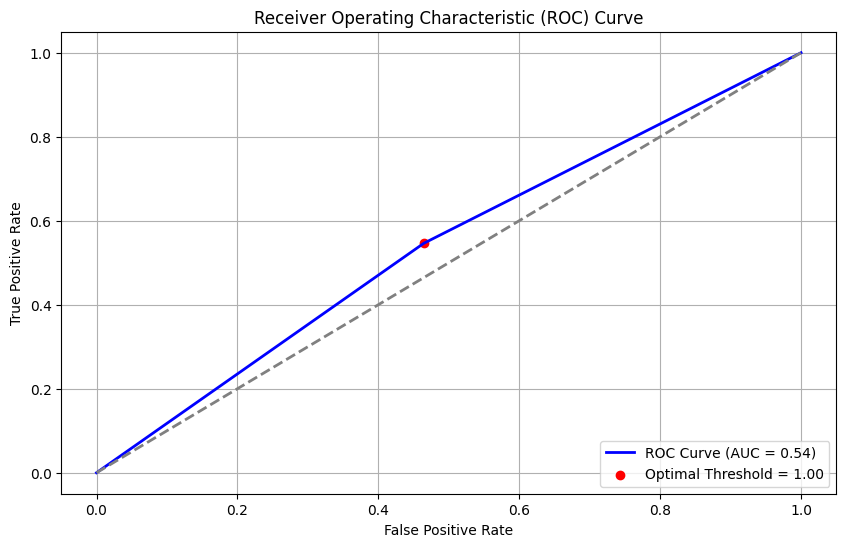

In [53]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

# Calculate the Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

# Print textual information
print(f"Optimal Threshold: {optimal_threshold}")
print(f"AUC Score: {roc_auc:.2f}")

# Plotting the ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], marker='o', color='red', label=f'Optimal Threshold = {optimal_threshold:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [38]:
# Predict using the new threshold
y_pred = (y_pred >= optimal_threshold).astype(int)

# Evaluate the Ridge-regularized model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.16      0.54      0.25       577
           1       0.87      0.54      0.66      3464

    accuracy                           0.54      4041
   macro avg       0.52      0.54      0.46      4041
weighted avg       0.77      0.54      0.61      4041

[[ 310  267]
 [1607 1857]]


In [56]:
from sklearn.model_selection import GridSearchCV

# Tuning the C value using GridSearchCV to find the optimal regularization strength
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
log_reg = LogisticRegression()
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best C value
best_C = grid_search.best_params_['C']
print(f'Best C value: {best_C}')

# Train a final Lasso Logistic Regression model with the best C value
final_log_reg = LogisticRegression( C=best_C, random_state=42)
final_log_reg.fit(X_train_resampled, y_train_resampled)

# Predict and evaluate
y_pred_final = final_log_reg.predict(X_test)
print(classification_report(y_test, y_pred_final))

Best C value: 0.1
              precision    recall  f1-score   support

           0       0.16      0.53      0.25       577
           1       0.87      0.55      0.67      3464

    accuracy                           0.55      4041
   macro avg       0.52      0.54      0.46      4041
weighted avg       0.77      0.55      0.61      4041



In [40]:
y_pred

array([1, 1, 1, ..., 0, 0, 1])

In [41]:
X_train_updated

array([[0.42857143, 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.14285714, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.71428571, 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.28571429, 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.02664672, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.28571429, 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ]])

In [42]:
from imblearn.under_sampling import RandomUnderSampler

X = X_train_updated  
y = y_train_resampled  

rus = RandomUnderSampler(random_state=42)

# Apply Random Under Sampler
X_resampled, y_resampled = rus.fit_resample(X, y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Train a Logistic Regression model on the resampled dataset
log_reg_model_rus = LogisticRegression()
log_reg_model_rus.fit(X_train, y_train)

# Evaluate the model
y_pred = log_reg_model_rus.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.57      0.53      0.55      1075
           1       0.53      0.56      0.55      1008

    accuracy                           0.55      2083
   macro avg       0.55      0.55      0.55      2083
weighted avg       0.55      0.55      0.55      2083

[[575 500]
 [440 568]]


In [55]:

# Get predicted probabilities for class 1 (approved applications)
y_pred_prob = final_log_reg.predict_proba(X_test)[:, 1]

# Determine the threshold for 15% approval
# Sort probabilities in descending order
sorted_prob = np.sort(y_pred_prob)[::-1]

# Find the threshold that allows for 15% approval
threshold_idx = int(0.15 * len(sorted_prob))
new_threshold = sorted_prob[threshold_idx]

print(f"New threshold for 15% approval: {new_threshold}")

# Apply the new threshold to make predictions
y_pred_new = (y_pred_prob >= new_threshold).astype(int)

# Generate confusion matrix and classification report with the new threshold
conf_matrix = confusion_matrix(y_test, y_pred_new)
class_report = classification_report(y_test, y_pred_new)

print("Updated Confusion Matrix:")
print(conf_matrix)
print("\nUpdated Classification Report:")
print(class_report)

New threshold for 15% approval: 0.5912292303982245
Updated Confusion Matrix:
[[ 500   77]
 [2933  531]]

Updated Classification Report:
              precision    recall  f1-score   support

           0       0.15      0.87      0.25       577
           1       0.87      0.15      0.26      3464

    accuracy                           0.26      4041
   macro avg       0.51      0.51      0.26      4041
weighted avg       0.77      0.26      0.26      4041

